In [482]:
import matplotlib.pyplot as plt
import numpy as np
import sys
from sympy.solvers import solve
import seaborn as sns
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import signal
from scipy.io import wavfile
import sounddevice as sd

In [483]:
N1 = 3 + 1
N2 = 6 + 1
N3 = 12 + 1
N4 = 22 +  1

ci1 = np.logspace(np.log10(100), np.log10(8000), N1, endpoint=True, base=10)
ci2 = np.logspace(np.log10(100), np.log10(8000), N2, endpoint=True, base=10)
ci3 = np.logspace(np.log10(100), np.log10(8000), N3, endpoint=True, base=10)
ci4 = np.logspace(np.log10(100), np.log10(8000), N4, endpoint=True, base=10)



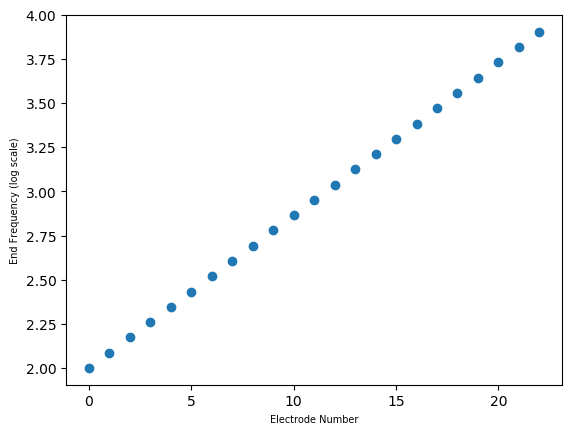

In [484]:
plt.plot(np.log10(ci4), 'o')
plt.xlabel('Electrode Number', fontsize=7)
plt.ylabel('End Frequency (log scale)', fontsize=7)
plt.savefig('elec.pdf')
plt.show()

In [485]:
def getButterworthFilter(ci, f_nyquist,filename):
    a = []
    b = []
    w = []
    h = []

    ci_norm = ci/f_nyquist
    for i in range(len(ci_norm)-1):
        a.append([])
        b.append([])
        w.append([])
        h.append([])
        lab = "Filter " + str(i+1)
    #     print(ci4_norm[i],' ',ci4_norm[i+1])
        b[i], a[i] = signal.butter(2, [ci_norm[i],ci_norm[i+1]], 'bandpass', analog=True)
    #     b[i], a[i] = signal.butter(2, [ci4_norm[i],ci4_norm[i+1]], 'band')
        w[i], h[i] = signal.freqs(b[i], a[i])
        plt.plot(w[i]*f_nyquist, 20 * np.log10(abs(h[i])), label=lab)

    plt.xscale('log')
#     plt.ylim(-4,0)
#     plt.xlim(7500,9500)
    plt.title('Butterworth filter frequency response')
    plt.xlabel('Frequency [radians / second]')
    plt.ylabel('Amplitude [dB]')
    plt.margins(0, 0.1)
    plt.legend()
    plt.grid(which='both', axis='both')
    # plt.axvline(100, color='green') # cutoff frequency
    plt.savefig(filename)
    plt.show()
    return b,a

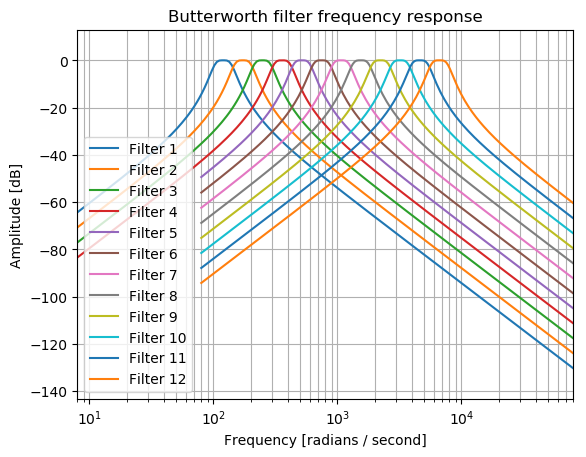

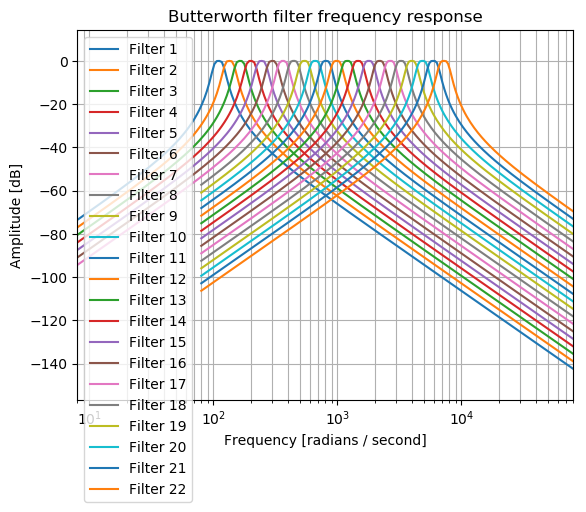

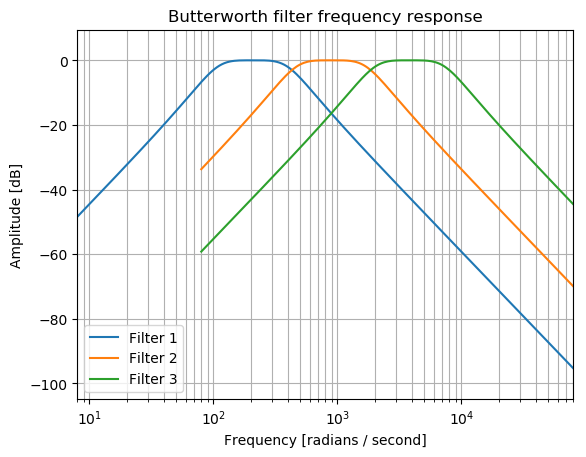

In [487]:
b12, a12 = getButterworthFilter(ci3,8000,'12_butterworth.pdf')
b22, a22 = getButterworthFilter(ci4,8000,'22_butterworth.pdf')
b3, a3 = getButterworthFilter(ci1,8000,'3_butterworth.pdf')

In [488]:
def PlotChannels(channels, n, fs, filename):
    plt.rc('font', size=3)
    plt.rc('figure', titlesize=5)
    plt.rc('xtick', labelsize=5)
    plt.rc('ytick', labelsize=5)
    t = np.linspace(0, n/fs, n)
    for i in range(1,len(channels)+1):
        lab = "Signal Channel " + str(i)
        ax = plt.subplot(6,2,i)
        ax.plot(t,channels[i-1]*10**5, label=lab)
        ax.set_title(lab, color='red')
        ax.set_xlabel('Seconds')
        ax.set_ylabel('Amplitude ($10^{5}$)')
        ax.set_xticks(np.arange(0,n/fs),(n/fs)/10)
        ax.grid(True)
    plt.subplots_adjust(wspace=0.5, hspace=2.5)
    plt.savefig(filename, dpi=300)
    plt.show()

In [489]:
def Sound(file,b,a,N):
    plt.rcParams.update(plt.rcParamsDefault)
    fs, data = wavfile.read(file+'.wav')
    n = len(data)
    t = np.linspace(0, n/fs, n)
    plt.plot(t,(data))
    plt.xlabel('Seconds (s)')
    plt.ylabel('Amplitude')
#     plt.xlim(1,1.02)
#     plt.xticks(np.arange(0,n/fs),(n/fs)/10)
    plt.grid(True)
    plt.savefig(file+"_signal.pdf", dpi=300)
    plt.show()
    
    Pxx, freqs, bins, im = plt.specgram(data, NFFT=441, Fs=fs, noverlap=220)
    plt.xlabel('t (s)')
    plt.ylabel('Frequency (Hz)')
    cbar = plt.colorbar(im)
    cbar.set_label('Amplitude')
    
    plt.savefig(file+'_original.pdf')
    plt.show()
    channels = []
    joint_signal = 0
    
    for i in range(0,N-1):
        channels.append([])
        channels[i] = signal.filtfilt(b[i], a[i], data)
        joint_signal = joint_signal + channels[i]
        
    PlotChannels(channels, n, fs, file+'_channels.pdf')
    plt.rcParams.update(plt.rcParamsDefault)
    plt.magnitude_spectrum(jd, Fs=fs, scale='dB', color='C1')
    plt.savefig(file+'_spectrum.pdf')
    plt.show()
#     plt.figure(figsize=(10, 10), dpi=100)
    Pxx, freqs, bins, im = plt.specgram(joint_signal, NFFT=441, Fs=fs, noverlap=220)
    plt.xlabel('t (s)')
    plt.ylabel('Frequency (Hz)')
    cbar = plt.colorbar(im)
    cbar.set_label('Amplitude')
    plt.savefig(file+'_joint.pdf')
    plt.show()
    
    return channels, joint_signal, data
    

/home/nikita/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


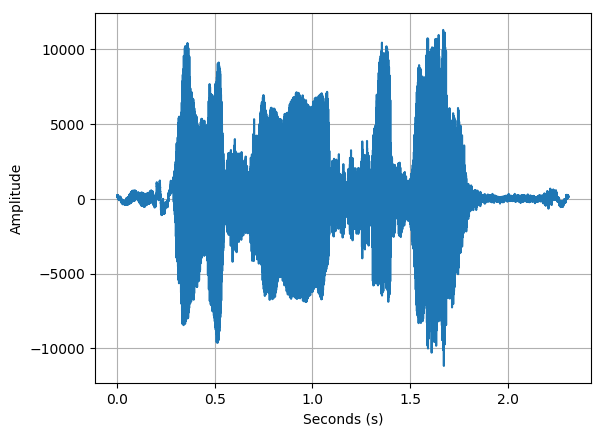

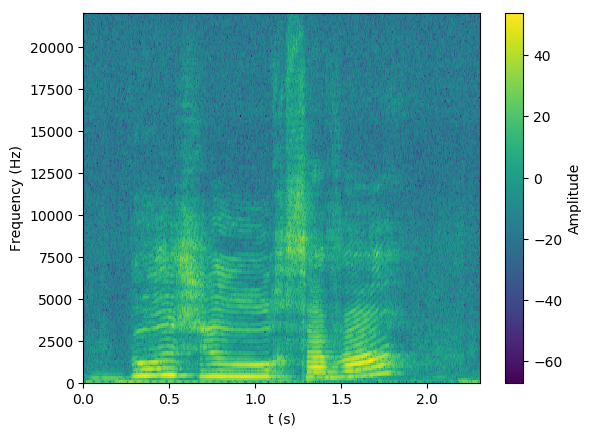

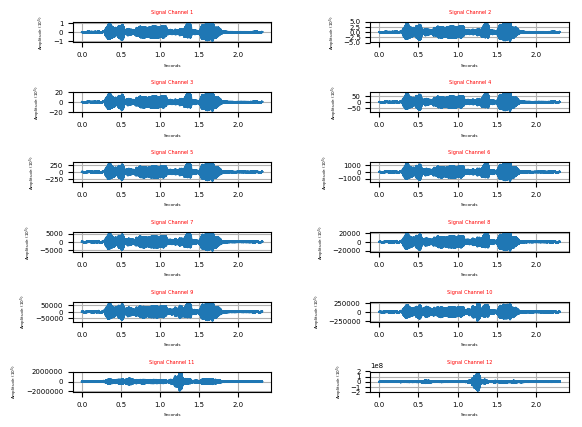

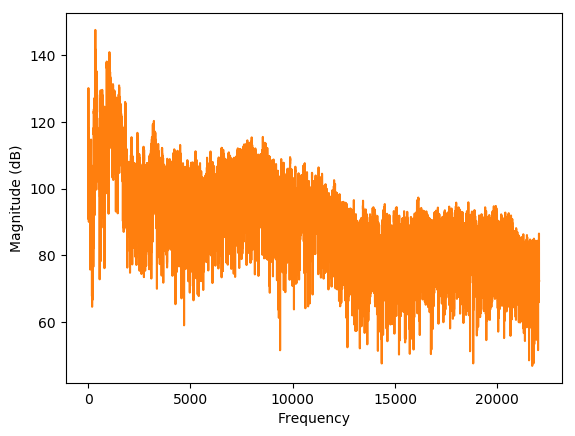

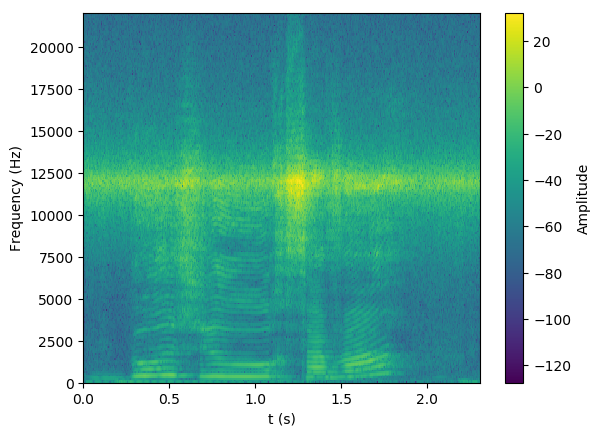

In [490]:
jc, js, jd = Sound('Joycelyne', b12, a12, N3)


In [352]:
sd.play(js)
min(js)

-0.0067636599879163867

/home/nikita/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


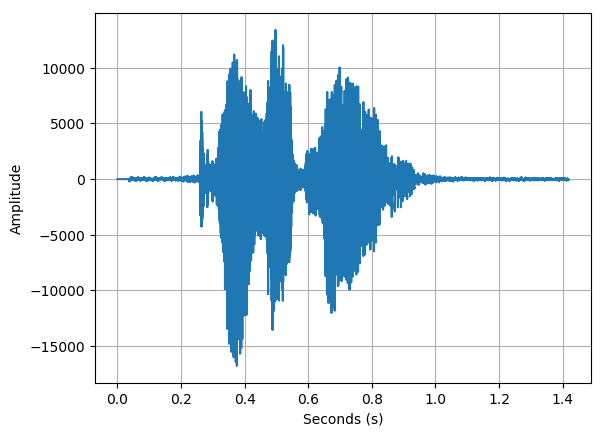

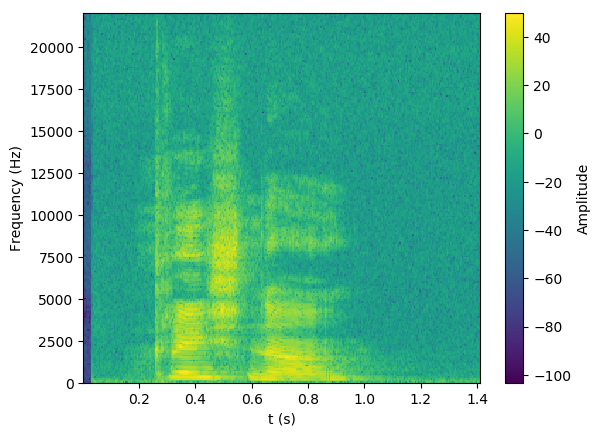

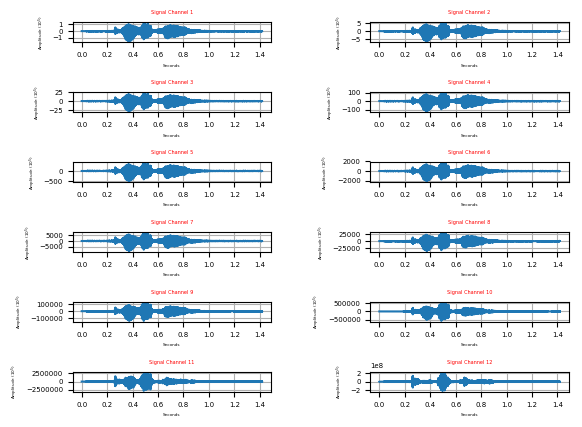

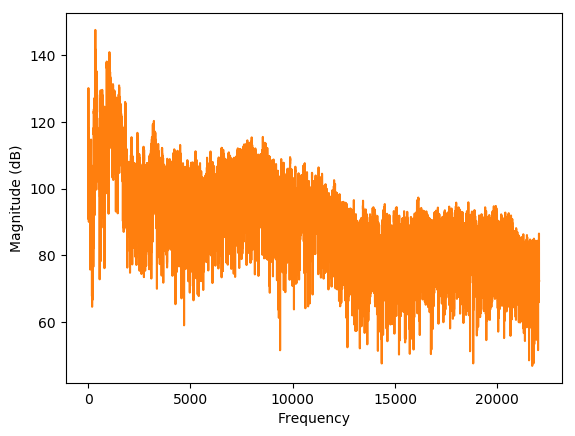

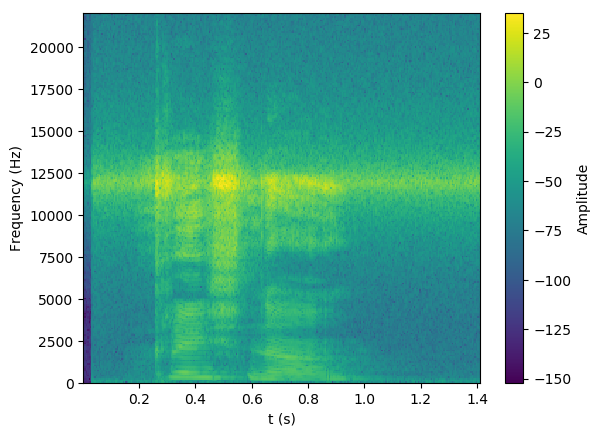

([array([  3.25464998e-37,  -7.93972416e-22,   2.91646592e-20, ...,
          -1.56937070e-08,  -3.26910157e-08,  -3.80653953e-08]),
  array([  4.81200367e-34,  -4.36984101e-20,   1.16461170e-18, ...,
          -6.58325661e-08,  -1.39824483e-07,  -1.62739651e-07]),
  array([  7.11649170e-31,  -2.39355445e-18,   4.71212413e-17, ...,
          -2.72127961e-07,  -5.95477309e-07,  -6.92940379e-07]),
  array([  1.05009096e-27,  -1.30064022e-16,   1.93866300e-15, ...,
          -1.09735306e-06,  -2.51740084e-06,  -2.93147050e-06]),
  array([  1.54214078e-24,  -6.96970916e-15,   8.13725791e-14, ...,
          -4.23219783e-06,  -1.05048019e-05,  -1.22704588e-05]),
  array([  2.24488973e-21,  -3.63867955e-13,   3.49093872e-12, ...,
          -1.49334411e-05,  -4.27961684e-05,  -5.04498906e-05]),
  array([  3.21325699e-18,  -1.80005576e-11,   1.52758775e-10, ...,
          -4.23773564e-05,  -1.66392845e-04,  -2.01114462e-04]),
  array([  4.45057086e-15,  -7.80250428e-10,   6.74604099e-09, ...,
 

In [491]:
Sound('Krishna', b12, a12, N3)

/home/nikita/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


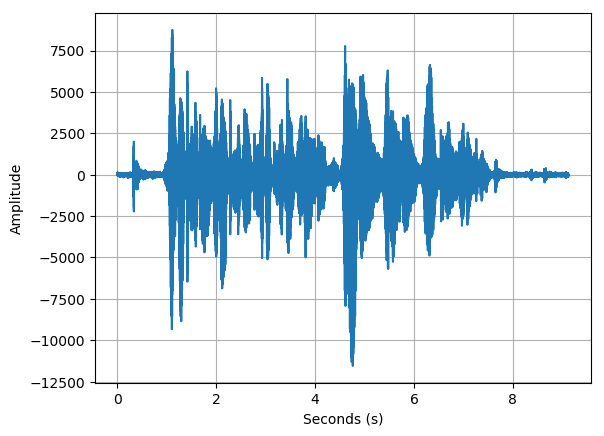

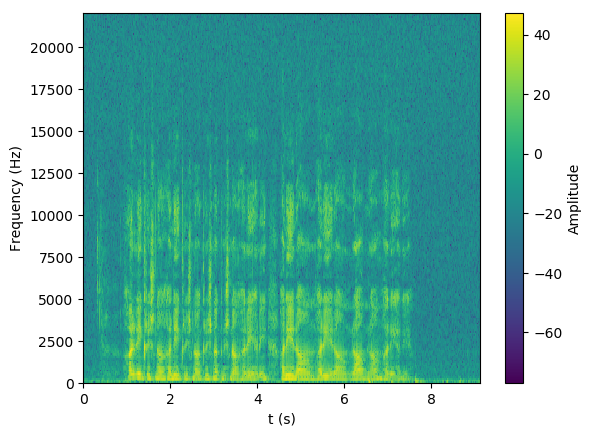

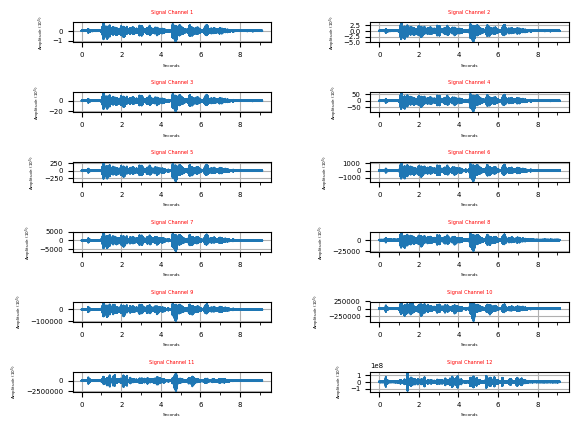

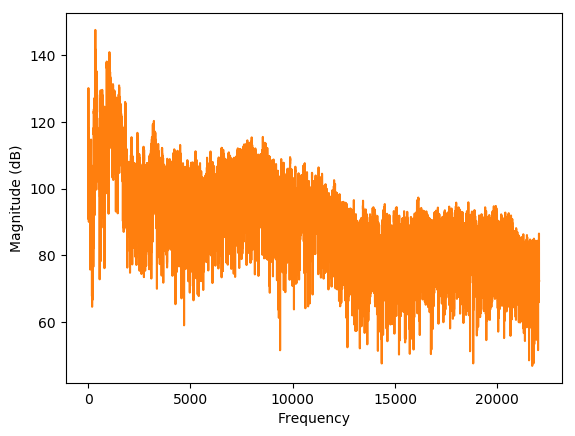

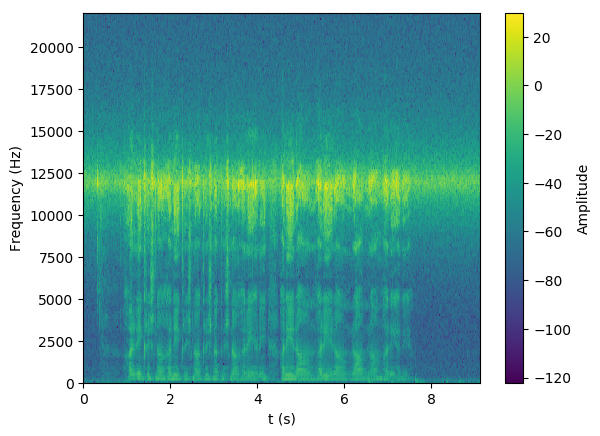

([array([  6.52549634e-08,   7.44590818e-08,   7.01817981e-08, ...,
          -1.62875492e-10,   3.79605119e-08,  -1.81263787e-08]),
  array([  2.78982259e-07,   3.18695599e-07,   3.00790301e-07, ...,
          -1.00683487e-09,   1.64026162e-07,  -7.74950719e-08]),
  array([  1.18789779e-06,   1.35969267e-06,   1.28532362e-06, ...,
          -6.22408723e-09,   7.10123240e-07,  -3.29971609e-07]),
  array([  5.02537801e-06,   5.77290179e-06,   5.46538867e-06, ...,
          -3.85574929e-08,   3.08514171e-06,  -1.39593834e-06]),
  array([  2.10350723e-05,   2.43296480e-05,   2.30449126e-05, ...,
          -2.40579802e-07,   1.34902922e-05,  -5.84307564e-06]),
  array([  8.64855268e-05,   1.01404278e-04,   9.57430992e-05, ...,
          -1.52855608e-06,   5.97006905e-05,  -2.40237574e-05]),
  array([  3.44767649e-04,   4.16123192e-04,   3.87303140e-04, ...,
          -1.00934729e-05,   2.70120558e-04,  -9.57687914e-05]),
  array([  1.30199544e-03,   1.68025054e-03,   1.49095317e-03, ...,
 

In [492]:
Sound('Mahamantra', b12, a12, N3)

/home/nikita/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


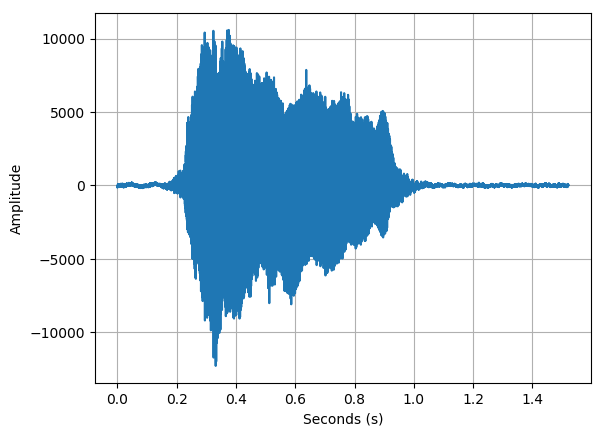

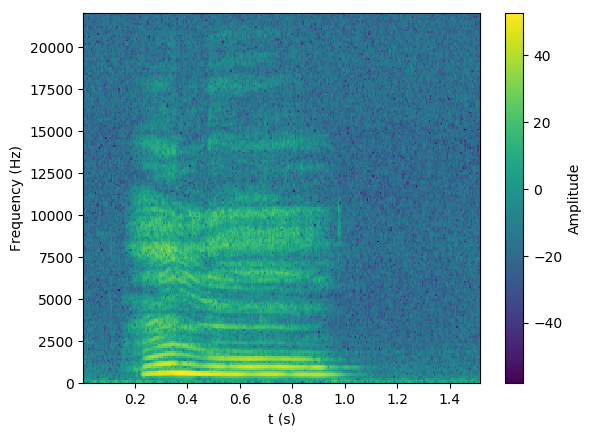

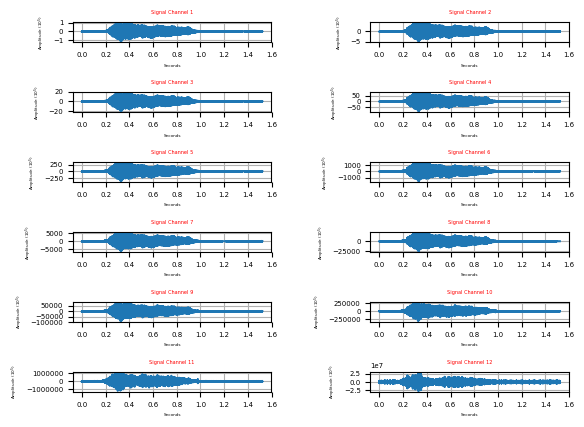

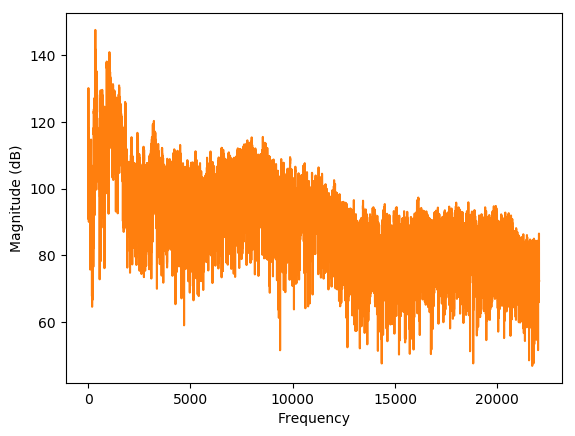

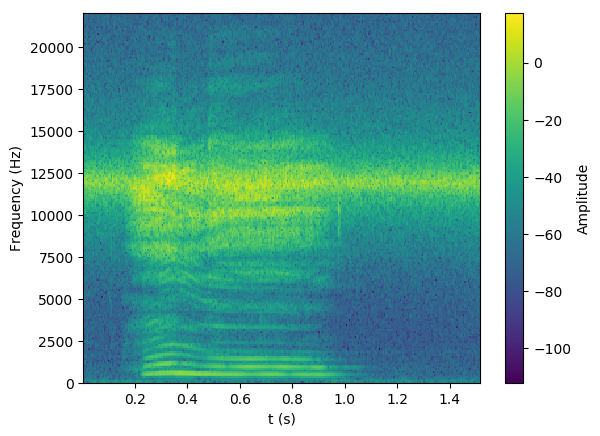

([array([ -7.25055148e-09,   5.54272696e-09,   7.44449651e-09, ...,
           4.38870169e-08,   2.34562039e-08,   1.81263787e-08]),
  array([ -3.09980288e-08,   2.39490910e-08,   3.22391609e-08, ...,
           1.88436443e-07,   1.00090377e-07,   7.74950719e-08]),
  array([ -1.31988644e-07,   1.03778508e-07,   1.40008636e-07, ...,
           8.07712378e-07,   4.25062223e-07,   3.29971609e-07]),
  array([ -5.58375334e-07,   4.52304587e-07,   6.10758503e-07, ...,
           3.45328258e-06,   1.79182087e-06,   1.39593834e-06]),
  array([ -2.33723026e-06,   1.99356629e-06,   2.68270754e-06, ...,
           1.47065138e-05,   7.46482906e-06,   5.84307564e-06]),
  array([ -9.60950297e-06,   8.97165259e-06,   1.18972976e-05, ...,
           6.22641539e-05,   3.05046917e-05,   2.40237574e-05]),
  array([ -3.83075166e-05,   4.18307796e-05,   5.32968085e-05, ...,
           2.61434834e-04,   1.20649407e-04,   9.57687914e-05]),
  array([-0.00014467,  0.00020542,  0.00023873, ...,  0.00108752,
   

In [493]:
Sound('Hello', b12, a12, N3)

/home/nikita/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


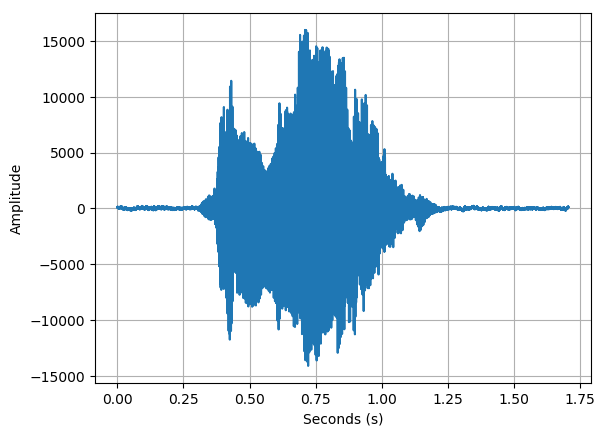

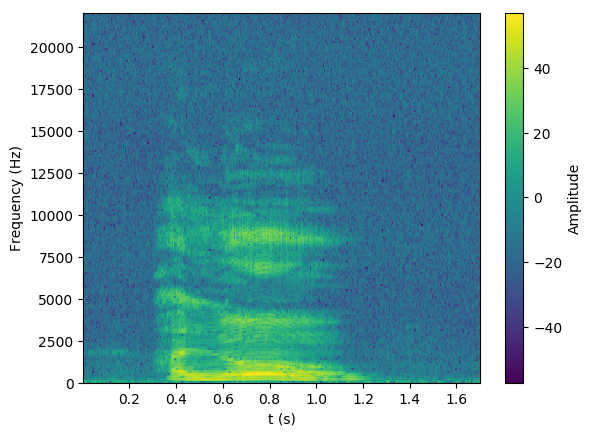

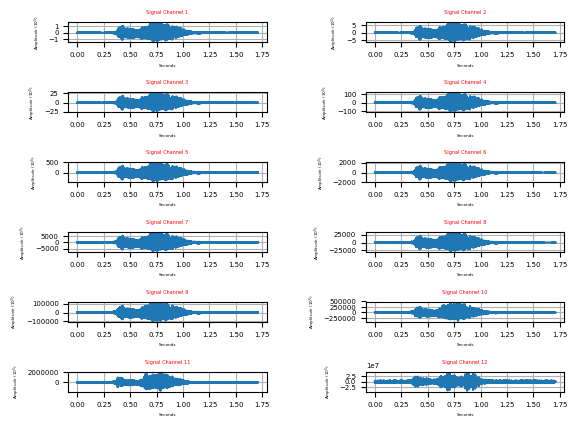

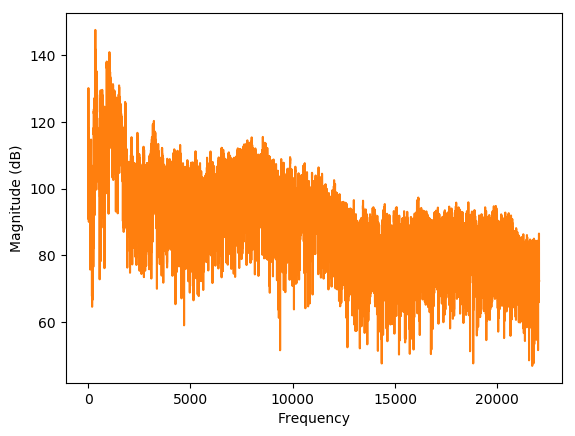

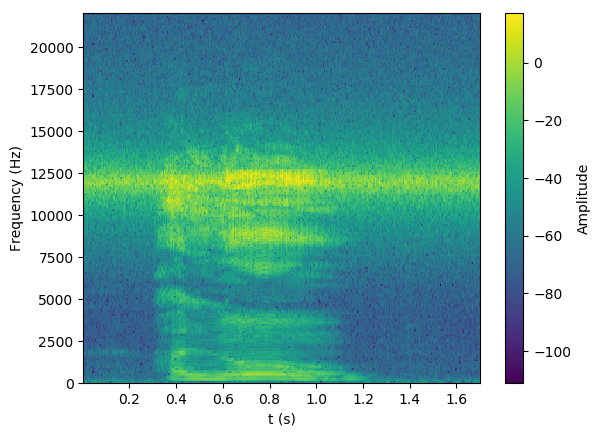

([array([  9.69761261e-08,   9.96298361e-08,   1.09645978e-07, ...,
           1.26521860e-07,   1.03450198e-07,   6.88802391e-08]),
  array([  4.14598635e-07,   4.25796096e-07,   4.68755925e-07, ...,
           5.42074012e-07,   4.42625387e-07,   2.94481273e-07]),
  array([  1.76534811e-06,   1.81199684e-06,   1.99600020e-06, ...,
           2.31588023e-06,   1.88730189e-06,   1.25389212e-06]),
  array([  7.46827009e-06,   7.65817599e-06,   8.44529642e-06, ...,
           9.85017222e-06,   8.00440925e-06,   5.30456567e-06]),
  array([  3.12604547e-05,   3.19990562e-05,   3.53653569e-05, ...,
           4.16005126e-05,   3.36645635e-05,   2.22036874e-05]),
  array([  1.28527102e-04,   1.31112126e-04,   1.45555715e-04, ...,
           1.73692060e-04,   1.39700564e-04,   9.12902783e-05]),
  array([ 0.00051236,  0.00051875,  0.00058157, ...,  0.00071182,
          0.00056743,  0.00036392]),
  array([ 0.00193491,  0.00192114,  0.00220653, ...,  0.00283189,
          0.00222996,  0.00137433

In [494]:
Sound('Helloh', b12, a12, N3)